In [1]:
#!/usr/bin/python

import sys
import pickle
import pandas as pd
import csv
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns


from time import time

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import fbeta_score , accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline


#sys.path.append("../tools/")
#sys.path.append("C:/ud120-projects/tools/")

with open("final_project_dataset.pkl", "rb") as f:
     data_dict = pickle.load(f)


from feature_format import featureFormat, targetFeatureSplit
from tester import test_classifier, dump_classifier_and_data

#Tester file was converted to python 3


This is all the individuals in the dictionary that are being analyzed in the Enron project. One that is strange is "THE TRAVEL AGENCY IN THE PARK". We will need to remove that one in the outliers section. 

In [2]:
for key in data_dict:
    print(key)

METTS MARK
BAXTER JOHN C
ELLIOTT STEVEN
CORDES WILLIAM R
HANNON KEVIN P
MORDAUNT KRISTINA M
MEYER ROCKFORD G
MCMAHON JEFFREY
HAEDICKE MARK E
PIPER GREGORY F
HUMPHREY GENE E
NOLES JAMES L
BLACHMAN JEREMY M
SUNDE MARTIN
GIBBS DANA R
LOWRY CHARLES P
COLWELL WESLEY
MULLER MARK S
JACKSON CHARLENE R
WESTFAHL RICHARD K
WALTERS GARETH W
WALLS JR ROBERT H
KITCHEN LOUISE
CHAN RONNIE
BELFER ROBERT
SHANKMAN JEFFREY A
WODRASKA JOHN
BERGSIEKER RICHARD P
URQUHART JOHN A
BIBI PHILIPPE A
RIEKER PAULA H
WHALEY DAVID A
BECK SALLY W
HAUG DAVID L
ECHOLS JOHN B
MENDELSOHN JOHN
HICKERSON GARY J
CLINE KENNETH W
LEWIS RICHARD
HAYES ROBERT E
KOPPER MICHAEL J
LEFF DANIEL P
LAVORATO JOHN J
BERBERIAN DAVID
DETMERING TIMOTHY J
WAKEHAM JOHN
POWERS WILLIAM
GOLD JOSEPH
BANNANTINE JAMES M
DUNCAN JOHN H
SHAPIRO RICHARD S
SHERRIFF JOHN R
SHELBY REX
LEMAISTRE CHARLES
DEFFNER JOSEPH M
KISHKILL JOSEPH G
WHALLEY LAWRENCE G
MCCONNELL MICHAEL S
PIRO JIM
DELAINEY DAVID W
SULLIVAN-SHAKLOVITZ COLLEEN
WROBEL BRUCE
LINDHOLM TOD A
M

Change the dictionary into a dataframe and look at some general statistics. 
The dataframe is 21 columns, 143 entries so it is not very large. 

In [3]:
df = pd.DataFrame.from_dict(data_dict, orient = 'index')
df.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
unique,95,87,40,126,5,42,112,19,45,125,...,58,102,65,93,42,2,53,84,98,18
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
freq,51,60,107,21,142,64,35,128,97,20,...,60,44,60,53,60,128,80,60,36,129


## Question 1: 
The goal of this project is to be able to use this information to identify persons of interest. This could help identify fraud faster before it would cause the amount of issues that Enron caused. It could also identify additional persons of interest that 
weren't caught by humans. 
This data set had a lot of missing data in the rows, as well as some columns that were missing 80% of the data. Those were removed, and populated with 0s to do the analysis during the data exploration. 

Almost all the fields are stored as objects. They can be converted to integers (except the email address)
and have the Nans removed. POI is the person of interest and is bool. We can change that to int so it will be 0, 1.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   salary                     146 non-null    object
 1   to_messages                146 non-null    object
 2   deferral_payments          146 non-null    object
 3   total_payments             146 non-null    object
 4   loan_advances              146 non-null    object
 5   bonus                      146 non-null    object
 6   email_address              146 non-null    object
 7   restricted_stock_deferred  146 non-null    object
 8   deferred_income            146 non-null    object
 9   total_stock_value          146 non-null    object
 10  expenses                   146 non-null    object
 11  from_poi_to_this_person    146 non-null    object
 12  exercised_stock_options    146 non-null    object
 13  from_messages              146 non-null    object

There are 18 persons of interest in this dataset.

False    128
True      18
Name: poi, dtype: int64


<AxesSubplot:>

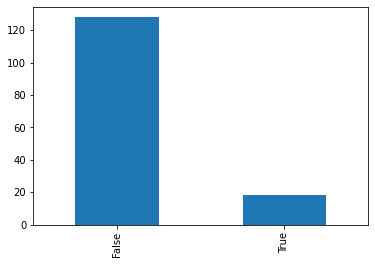

In [5]:
print(df['poi'].value_counts())
df['poi'].value_counts().plot(kind='bar')

Replace all the Nans in the dataset. Then convert them to integers. This will be done in the dataframe just to explore and analyze. Later, it will be cleaned up in the module for the data dictionary.

In [6]:

for col in df.columns:
    df[col] = df[col].apply(lambda x: np.NaN if x == 'NaN' else x)
    print(col)

salary
to_messages
deferral_payments
total_payments
loan_advances
bonus
email_address
restricted_stock_deferred
deferred_income
total_stock_value
expenses
from_poi_to_this_person
exercised_stock_options
from_messages
other
from_this_person_to_poi
poi
long_term_incentive
shared_receipt_with_poi
restricted_stock
director_fees


Now the data is converted. 
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     95 non-null     float64
 1   to_messages                86 non-null     float64
 2   deferral_payments          39 non-null     float64
 3   total_payments             125 non-null    float64
 4   loan_advances              4 non-null      float64
 5   bonus                      82 non-null     float64
 6   email_address              111 non-null    object 
 7   restricted_stock_deferred  18 non-null     float64
 8   deferred_income            49 non-null     float64
 9   total_stock_value          126 non-null    float64
 10  expenses                   95 non-null     float64
 11  from_poi_to_this_person    86 non-null     float64
 12  exercised_stock_options    102 non-null    float64
 13  from_messages              86 non-

This shows the percentage of missing values in each column. Some columns are missing almost all the data. Those will not be included in the features list. First, histograms can be used to get a better look at the data. 

In [8]:
df.drop(['email_address'], axis = 1, inplace = True)

In [9]:
feat_list =[]
for attrib in df:
    null_val = df[attrib].isnull().sum()
    total_val = 143
    total_percent = round(( null_val / 143) * 100 ,1)
    print(attrib, total_percent, '%')
    if total_percent < 80 and attrib != 'poi':
        feat_list.append(attrib)

        

salary 35.7 %
to_messages 42.0 %
deferral_payments 74.8 %
total_payments 14.7 %
loan_advances 99.3 %
bonus 44.8 %
restricted_stock_deferred 89.5 %
deferred_income 67.8 %
total_stock_value 14.0 %
expenses 35.7 %
from_poi_to_this_person 42.0 %
exercised_stock_options 30.8 %
from_messages 42.0 %
other 37.1 %
from_this_person_to_poi 42.0 %
poi 0.0 %
long_term_incentive 55.9 %
shared_receipt_with_poi 42.0 %
restricted_stock 25.2 %
director_fees 90.2 %


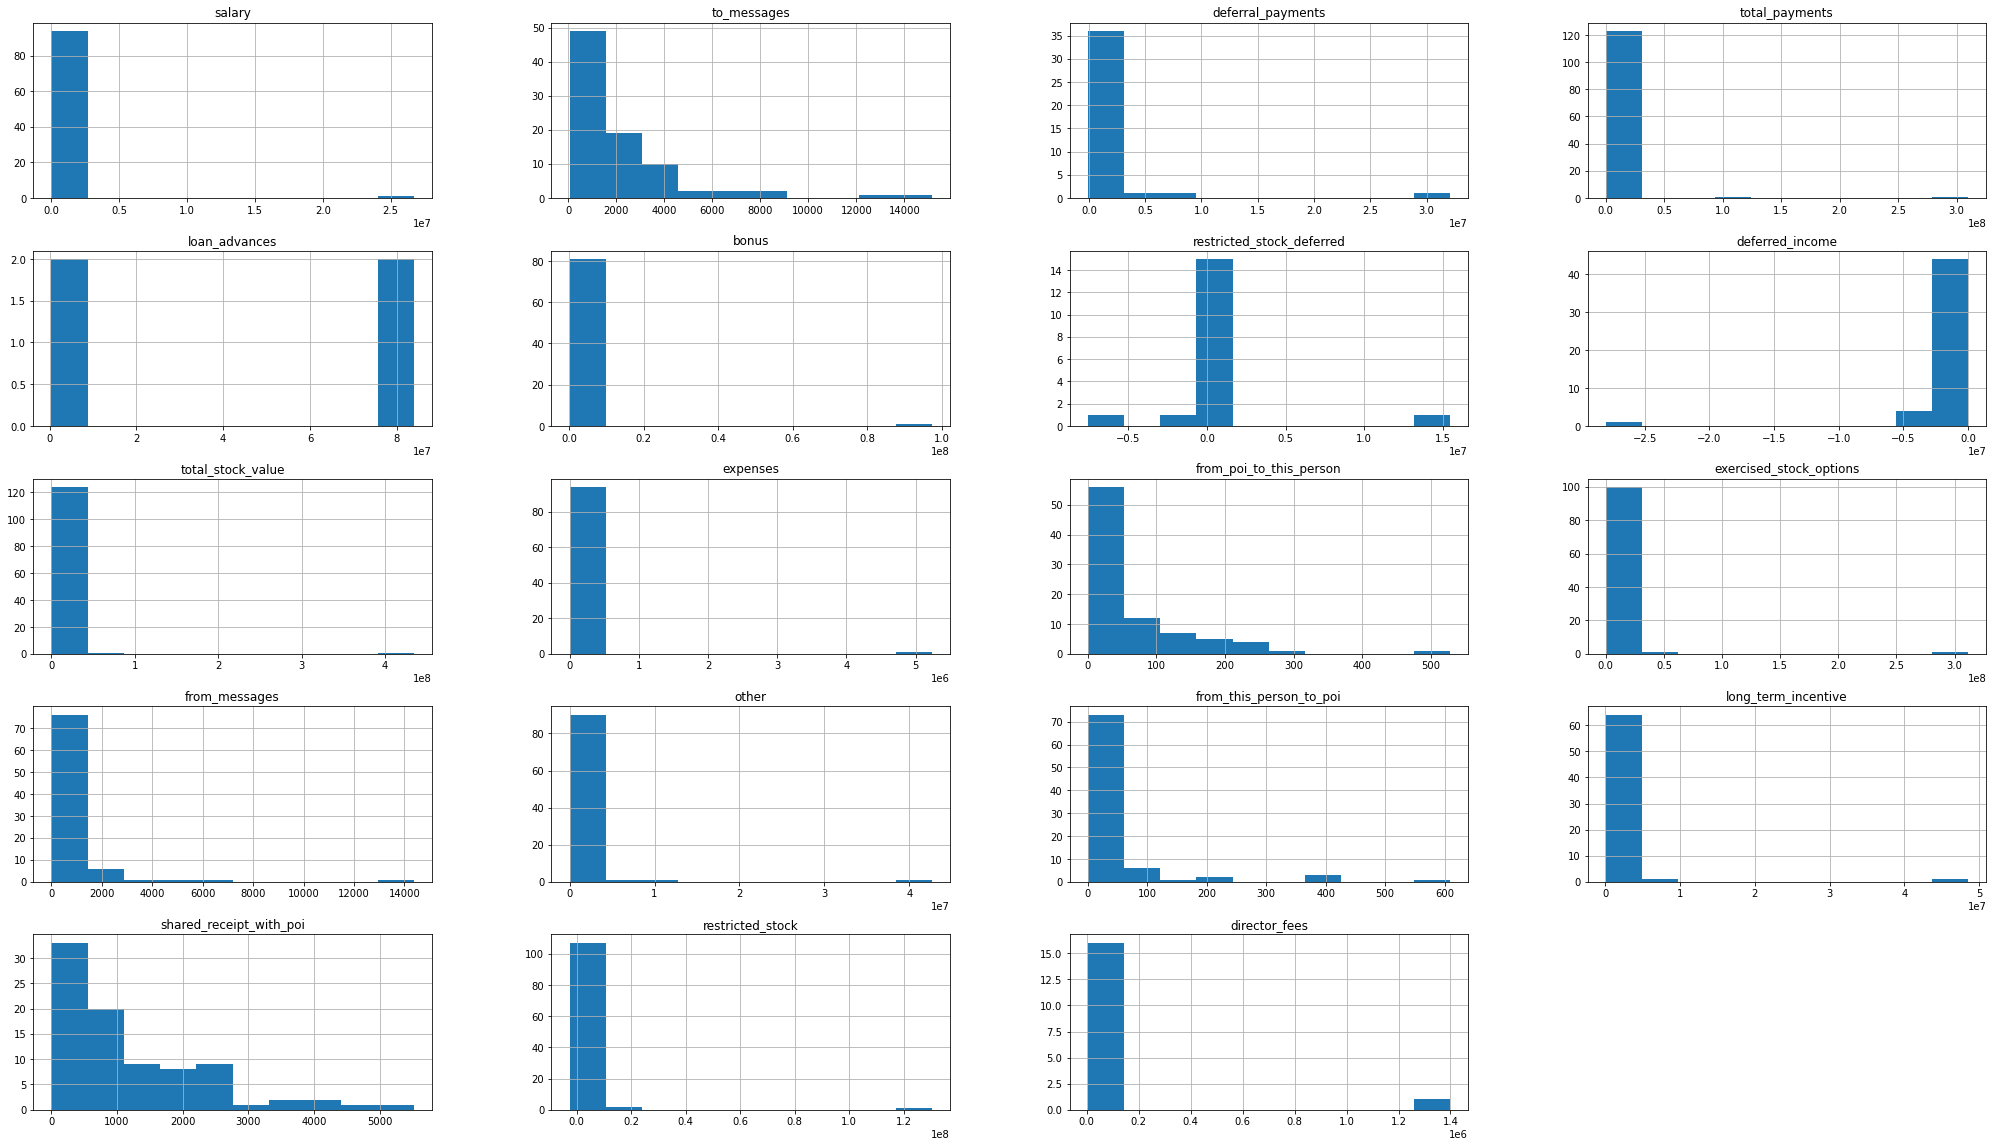

In [10]:
df.hist(figsize = (35, 20))
plt.show()

The histograms can give an idea of frequencies and the distribution of the data, but box plots will be better 
for identifying the outliers. 

In [11]:
df['poi'] = df['poi'].fillna(0).astype(int)
print(df['poi'])

METTS MARK              0
BAXTER JOHN C           0
ELLIOTT STEVEN          0
CORDES WILLIAM R        0
HANNON KEVIN P          1
                       ..
GRAMM WENDY L           0
CAUSEY RICHARD A        1
TAYLOR MITCHELL S       0
DONAHUE JR JEFFREY M    0
GLISAN JR BEN F         1
Name: poi, Length: 146, dtype: int32


In [12]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
### poi_id

features_list = ['poi','salary' ,'to_messages','deferral_payments','total_payments','loan_advances','bonus',
'deferred_income',
'expenses',
'from_poi_to_this_person',
'exercised_stock_options',
'from_messages',
'other',
'from_this_person_to_poi',
'long_term_incentive',
'shared_receipt_with_poi',
'restricted_stock']
print(len(features_list))

17


## Question 2:
Due to lack of data, the following columns were removed.
 director_fees, restricted_stock_deferred, and loan advances due to lack of data. 
The rest were used in the features list. Because some amounts like salary and bonus are so large compared to other values,scaling was used to balance out the analysis. 

In [13]:
print(features_list)

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'deferred_income', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock']


In [14]:
df.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,9.500000e+01,86.000000,3.900000e+01,1.250000e+02,4.000000e+00,8.200000e+01,1.800000e+01,4.900000e+01,1.260000e+02,9.500000e+01,86.000000,1.020000e+02,86.000000,9.300000e+01,86.000000,146.000000,6.600000e+01,86.000000,1.100000e+02,1.700000e+01
mean,5.621943e+05,2073.860465,1.642674e+06,5.081526e+06,4.196250e+07,2.374235e+06,1.664106e+05,-1.140475e+06,6.773957e+06,1.087289e+05,64.895349,5.987054e+06,608.790698,9.190650e+05,41.232558,0.123288,1.470361e+06,1176.465116,2.321741e+06,1.668049e+05
std,2.716369e+06,2582.700981,5.161930e+06,2.906172e+07,4.708321e+07,1.071333e+07,4.201494e+06,4.025406e+06,3.895777e+07,5.335348e+05,86.979244,3.106201e+07,1841.033949,4.589253e+06,100.073111,0.329899,5.942759e+06,1178.317641,1.251828e+07,3.198914e+05
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,4.000000e+05,7.000000e+04,-7.576788e+06,-2.799289e+07,-4.409300e+04,1.480000e+02,0.000000,3.285000e+03,12.000000,2.000000e+00,0.000000,0.000000,6.922300e+04,2.000000,-2.604490e+06,3.285000e+03
25%,2.118160e+05,541.250000,8.157300e+04,3.944750e+05,1.600000e+06,4.312500e+05,-3.896218e+05,-6.948620e+05,4.945102e+05,2.261400e+04,10.000000,5.278862e+05,22.750000,1.215000e+03,1.000000,0.000000,2.812500e+05,249.750000,2.540180e+05,9.878400e+04
50%,2.599960e+05,1211.000000,2.274490e+05,1.101393e+06,4.176250e+07,7.693750e+05,-1.469750e+05,-1.597920e+05,1.102872e+06,4.695000e+04,35.000000,1.310814e+06,41.000000,5.238200e+04,8.000000,0.000000,4.420350e+05,740.500000,4.517400e+05,1.085790e+05
75%,3.121170e+05,2634.750000,1.002672e+06,2.093263e+06,8.212500e+07,1.200000e+06,-7.500975e+04,-3.834600e+04,2.949847e+06,7.995250e+04,72.250000,2.547724e+06,145.500000,3.620960e+05,24.750000,0.000000,9.386720e+05,1888.250000,1.002370e+06,1.137840e+05
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,8.392500e+07,9.734362e+07,1.545629e+07,-8.330000e+02,4.345095e+08,5.235198e+06,528.000000,3.117640e+08,14368.000000,4.266759e+07,609.000000,1.000000,4.852193e+07,5521.000000,1.303223e+08,1.398517e+06


Missing Values in Rows 1323


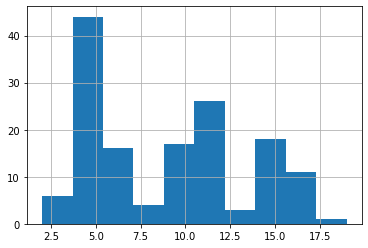

In [15]:
NAN_Count_row = df.isnull().sum(axis = 1)
print('Missing Values in Rows', NAN_Count_row.sum())
df['NAN_CNT'] = NAN_Count_row
NAN_Count_row.hist()
plt.show()


### Task 2: Remove outliers
This section will explore the outliers in the dataset. Many of the rows pictured above are missing data. This section will look
for inaccurate data and remove it. 

In [16]:
#df_clean = df[df['NAN_CNT'] <= 15].copy()
#df_clean.shape

In [17]:
#print(df_clean['poi'].value_counts())



In [18]:
#Replace the nan values with 0 
df = df.replace(np.NaN,0)

In [19]:
#df_clean.drop(['NAN_CNT'], axis = 1, inplace = True)

In [20]:
df.head(10)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,...,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,NAN_CNT
METTS MARK,365788.0,807.0,0.0,1061827.0,0.0,600000.0,0.0,0.0,585062.0,94299.0,...,0.0,29.0,1740.0,1.0,0,0.0,702.0,585062.0,0.0,7
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,0.0,1200000.0,0.0,-1386055.0,10623258.0,11200.0,...,6680544.0,0.0,2660303.0,0.0,0,1586055.0,0.0,3942714.0,0.0,8
ELLIOTT STEVEN,170941.0,0.0,0.0,211725.0,0.0,350000.0,0.0,-400729.0,6678735.0,78552.0,...,4890344.0,0.0,12961.0,0.0,0,0.0,0.0,1788391.0,0.0,10
CORDES WILLIAM R,0.0,764.0,0.0,0.0,0.0,0.0,0.0,0.0,1038185.0,0.0,...,651850.0,12.0,0.0,0.0,0,0.0,58.0,386335.0,0.0,11
HANNON KEVIN P,243293.0,1045.0,0.0,288682.0,0.0,1500000.0,0.0,-3117011.0,6391065.0,34039.0,...,5538001.0,32.0,11350.0,21.0,1,1617011.0,1035.0,853064.0,0.0,4
MORDAUNT KRISTINA M,267093.0,0.0,0.0,628522.0,0.0,325000.0,0.0,0.0,208510.0,35018.0,...,0.0,0.0,1411.0,0.0,0,0.0,0.0,208510.0,0.0,12
MEYER ROCKFORD G,0.0,232.0,1848227.0,1848227.0,0.0,0.0,0.0,0.0,955873.0,0.0,...,493489.0,28.0,0.0,0.0,0,0.0,22.0,462384.0,0.0,9
MCMAHON JEFFREY,370448.0,2355.0,0.0,4099771.0,0.0,2600000.0,0.0,0.0,1662855.0,137108.0,...,1104054.0,48.0,297353.0,26.0,0,694862.0,2228.0,558801.0,0.0,5
HAEDICKE MARK E,374125.0,4009.0,2157527.0,3859065.0,0.0,1150000.0,-329825.0,-934484.0,803094.0,76169.0,...,608750.0,1941.0,52382.0,61.0,0,983346.0,1847.0,524169.0,0.0,2
PIPER GREGORY F,197091.0,1238.0,1130036.0,1737629.0,0.0,400000.0,-409554.0,-33333.0,880290.0,43057.0,...,880290.0,222.0,778.0,48.0,0,0.0,742.0,409554.0,0.0,3


Looking at the correlation, the strongest correlations with POI tend to be around the financial data, especially payments.

<AxesSubplot:>

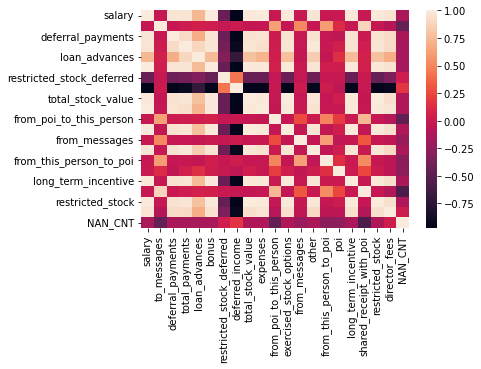

In [21]:
sns.heatmap(df.corr())

This will examine the outliers in salary. While it makes sense for a company to have a few individuals that make way more than most individuals (like the CEO compared to the rest of the staff), it really doesn't make sense for people to make less than minimum wage. It's possible that they have worked less than a year, or maybe there is another explanation, but it would be better to remove these outliers or replace it with the median. They seem to have a significant amount in bonus or stocks which makes it seem more of a miskey. Neither is a POI.

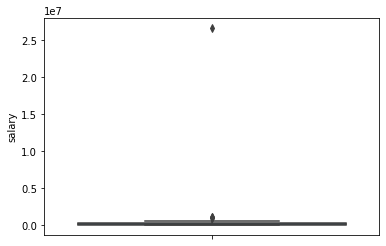

In [22]:
sns.boxplot(y = df['salary']);
plt.show()

In [23]:
avg_salary = np.mean(df['salary'])

median_salary = np.nanmedian(df['salary'])
min_salary = np.min(df['salary'])
max_salary = np.max(df['salary'])

print("The average salary is {}, the median is {}, min {}, max {}.".format(avg_salary, median_salary, min_salary, max_salary))

The average salary is 365811.3561643836, the median is 210596.0, min 0.0, max 26704229.0.


In [24]:
salary_outlier = df[df['salary'] >= 2000000].copy()

In [25]:
salary_outlier.head(10)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,...,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,NAN_CNT
TOTAL,26704229.0,0.0,32083396.0,309886585.0,83925000.0,97343619.0,-7576788.0,-27992891.0,434509511.0,5235198.0,...,311764000.0,0.0,42667589.0,0.0,0,48521928.0,0.0,130322299.0,1398517.0,5


The total line should be deleted. This is not a person and will mess up the results. Once that is taken out, the 
box plot should look more normal. 

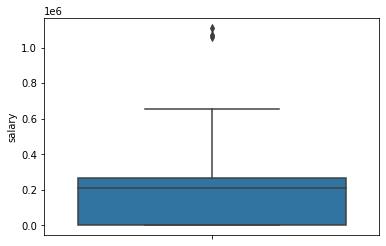

In [26]:
df.drop(['TOTAL'], axis = 0, inplace = True)
sns.boxplot(y = df['salary']);
plt.show()

The total line should be deleted. This is not a person and will mess up the results. Once that is taken out, the 
box plot should look more normal. 

In [27]:
#Update the salary to the median_salary
#data_dict['GRAY RODNEY']['salary'] = median_salary 
#data_dict['BANNANTINE JAMES M']['salary'] = median_salary


In [28]:
def find_outliers(field):
    sns.boxplot(y = df[field]);
    plt.show()

These three fields also seem to have some extreme outliers. 

In [29]:

box_plot_list = ['to_messages', 'expenses',  'shared_receipt_with_poi']


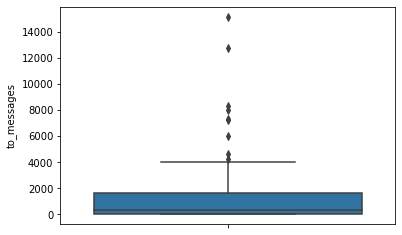

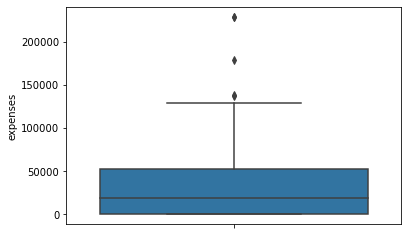

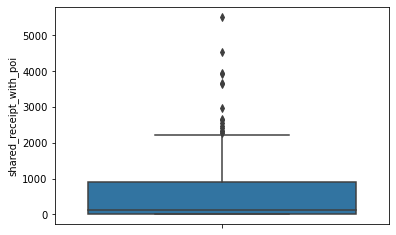

In [30]:
for field in box_plot_list:
    find_outliers(field)

In [31]:
message_outlier = df[df['to_messages'] >= 8000].copy()
message_outlier.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,...,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,NAN_CNT
KITCHEN LOUISE,271442.0,8305.0,0.0,3471141.0,0.0,3100000.0,0.0,0.0,547143.0,5774.0,...,81042.0,1728.0,93925.0,194.0,0,0.0,3669.0,466101.0,0.0,6
SHAPIRO RICHARD S,269076.0,15149.0,0.0,1057548.0,0.0,650000.0,0.0,0.0,987001.0,137767.0,...,607837.0,1215.0,705.0,65.0,0,0.0,4527.0,379164.0,0.0,6
KEAN STEVEN J,404338.0,12754.0,0.0,1747522.0,0.0,1000000.0,0.0,0.0,6153642.0,41953.0,...,2022048.0,6759.0,1231.0,387.0,0,300000.0,3639.0,4131594.0,0.0,5


In [32]:
expenses_outlier = df[df['expenses'] >= 200000].copy()
expenses_outlier.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,...,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,NAN_CNT
URQUHART JOHN A,0.0,0.0,0.0,228656.0,0.0,0.0,0.0,-36666.0,0.0,228656.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,36666.0,15
MCCLELLAN GEORGE,263413.0,1744.0,0.0,1318763.0,0.0,900000.0,0.0,-125000.0,947861.0,228763.0,...,506765.0,49.0,51587.0,0.0,0,0.0,1469.0,441096.0,0.0,5


While these three people have a lot of "to_messages", it seems they may just receive a lot of emails. Looking at the 50% in the describe table, most people have way more to_messages than from_messages (way more than 2x as many). The highest to_messages is twice the from_messages, so that one is probably correct. These people are not poi.

John A Urquhart has an extremely high expense. He's not POI but he is missing 13 fields from his record. He will be removed from the dataset. The other two are not people, and the total line is really throwing off the statistics.

In [33]:
# add to poi_id
#Removed due to too much missing data in the record. 
data_dict.pop('URQUHART JOHN A', None)
#Removed this as it is not a person.
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', None)
data_dict.pop('TOTAL', None)
len(data_dict)

143

In [34]:
receipt_outlier = df[df['shared_receipt_with_poi'] >= 4000].copy()
receipt_outlier.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,...,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,NAN_CNT
SHAPIRO RICHARD S,269076.0,15149.0,0.0,1057548.0,0.0,650000.0,0.0,0.0,987001.0,137767.0,...,607837.0,1215.0,705.0,65.0,0,0.0,4527.0,379164.0,0.0,6
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,0.0,5249999.0,0.0,-2334434.0,1110705.0,17355.0,...,953136.0,484.0,210698.0,108.0,1,0.0,5521.0,157569.0,0.0,4


Timothy is a POI that seems to share a lot of receipts with other POIs. Richard is not a poi, but his data seems mostly in tact. I will leave both of these outliers alone. 
Knowing more about the business would help to identify more outliers. Having information like job title could help to explain
salaries and expenses. Seeing the subjects and info from the emails would be very interesting. If a POI was a boss or subordinate for example, that could explain more interaction, but not nessarily association.

In [35]:


df['total_check'] = df['salary'] + df['deferral_payments'] + df['deferred_income'] + df['bonus'] + df['expenses'] + df['other'] + df['long_term_incentive']  

    

In [36]:
df['total_check'] = df['total_check'] + df['director_fees']
df['error'] = df['total_check'] - df['total_payments']
error_outlier = df[df['error'] != 0 ].copy()
len(error_outlier)
error_outlier.head(19)

        

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,...,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,NAN_CNT,total_check,error
BELFER ROBERT,0.0,0.0,-102500.0,102500.0,0.0,0.0,44093.0,0.0,-44093.0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,3285.0,13,-99215.0,-201715.0
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,0.0,-300000.0,49110078.0,99832.0,...,10359729.0,16.0,1,3600000.0,2411.0,14761694.0,0.0,2,22034793.0,-81525000.0
PICKERING MARK R,655037.0,898.0,0.0,1386690.0,400000.0,300000.0,0.0,0.0,28798.0,31653.0,...,0.0,0.0,0,0.0,728.0,0.0,0.0,7,986690.0,-400000.0
BHATNAGAR SANJAY,0.0,523.0,0.0,15456290.0,0.0,0.0,15456290.0,0.0,0.0,0.0,...,137864.0,1.0,0,0.0,463.0,-2604490.0,137864.0,8,275728.0,-15180562.0
FREVERT MARK A,1060932.0,3275.0,6426990.0,17252530.0,2000000.0,2000000.0,0.0,-3367011.0,14622185.0,86987.0,...,7427621.0,6.0,0,1617011.0,2979.0,4188667.0,0.0,2,15252530.0,-2000000.0


The total payments do not add up for these five individuals. Lay Kenneth L is a POI so we do not want to delete him. They 
were not identified as outliers in salary, so it must be at least one of the other 8 fields that are off. Belfer Robert is 
missing 14 data fields. Not a poi, and not messages to a poi so I will just delete him.

In [37]:
# add to poi_id
#Removed due to too much missing data in the record and wrong totals.
data_dict.pop('LAY KENNETH L', None)

len(data_dict)

142

These new features were created, the proportion of the emails to the POI and the total compensation. The proportion of emails to the poi were created because it will show how many emails are related to POI even if they are not poi themselves. If they send a lot of emails, having a high email to POI count may not matter but this ratio will reveal more. The total compensation shows the large financial info like expenses, salary and bonus. People that have a higher salary would generally be able to expense and have a larger bonus. It would be strange to see a large bonus and low salary.

In [38]:
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
# Add to poi_id
#Check the proportion of messages to a person of interest
def poi_message_ratio(data_dict, features_list):
    '''Add calculated field to data dictionary
    data_dict- enter the data dictionary
    features_list enter desired features'''
    
    for data in data_dict:
        employee_data = data_dict[data]
        print(data)
        
   
        from_message = employee_data['from_messages']
        to_poi = employee_data['from_this_person_to_poi'] 
            
        print("From Messages:", from_message)
        print("To POI", to_poi)
        if to_poi == 'NaN':
            to_poi = 0
        else:
            to_poi = int(to_poi)
        if from_message == 'NaN':
            employee_data['POI_MESSAGE_RATIO'] = 0
        else:
            to_poi = int(to_poi)
            employee_data['POI_MESSAGE_RATIO'] = to_poi / from_message
            print("Ratio", employee_data['POI_MESSAGE_RATIO'])
            
          
    features_list += ['POI_MESSAGE_RATIO']





In [39]:
# Add to poi_id
def total_compensation(data_dict, features_list):
    '''Add calculated field to data dictionary
    data_dict- enter the data dictionary
    features_list enter desired features'''
    field = ['salary', 'bonus','expenses']
    for data in data_dict:
        employee_data = data_dict[data]
        
      
        salary = employee_data['salary']
        bonus = employee_data['bonus']
        expenses = employee_data['expenses']
        
        if salary == 'NaN':
            salary = 0
        else: 
            salary = int(salary)
        if bonus == 'NaN':
            bonus  = 0
        else:
            bonus = int(bonus)
        if expenses == 'NaN':
            expenses = 0
        else:
            expenses = int(expenses)
            
        employee_data['TOTAL_COMPENSATION'] = salary + bonus + expenses
        
        print(data, 'TOTAL COMP', employee_data['TOTAL_COMPENSATION'])
           
            
          
    features_list += ['TOTAL_COMPENSATION']


In [40]:
poi_message_ratio(data_dict, features_list)

METTS MARK
From Messages: 29
To POI 1
Ratio 0.034482758620689655
BAXTER JOHN C
From Messages: NaN
To POI NaN
ELLIOTT STEVEN
From Messages: NaN
To POI NaN
CORDES WILLIAM R
From Messages: 12
To POI 0
Ratio 0.0
HANNON KEVIN P
From Messages: 32
To POI 21
Ratio 0.65625
MORDAUNT KRISTINA M
From Messages: NaN
To POI NaN
MEYER ROCKFORD G
From Messages: 28
To POI 0
Ratio 0.0
MCMAHON JEFFREY
From Messages: 48
To POI 26
Ratio 0.5416666666666666
HAEDICKE MARK E
From Messages: 1941
To POI 61
Ratio 0.03142709943328181
PIPER GREGORY F
From Messages: 222
To POI 48
Ratio 0.21621621621621623
HUMPHREY GENE E
From Messages: 17
To POI 17
Ratio 1.0
NOLES JAMES L
From Messages: NaN
To POI NaN
BLACHMAN JEREMY M
From Messages: 14
To POI 2
Ratio 0.14285714285714285
SUNDE MARTIN
From Messages: 38
To POI 13
Ratio 0.34210526315789475
GIBBS DANA R
From Messages: 12
To POI 0
Ratio 0.0
LOWRY CHARLES P
From Messages: NaN
To POI NaN
COLWELL WESLEY
From Messages: 40
To POI 11
Ratio 0.275
MULLER MARK S
From Messages: 16


In [41]:
total_compensation(data_dict, features_list)

METTS MARK TOTAL COMP 1060087
BAXTER JOHN C TOTAL COMP 1478302
ELLIOTT STEVEN TOTAL COMP 599493
CORDES WILLIAM R TOTAL COMP 0
HANNON KEVIN P TOTAL COMP 1777332
MORDAUNT KRISTINA M TOTAL COMP 627111
MEYER ROCKFORD G TOTAL COMP 0
MCMAHON JEFFREY TOTAL COMP 3107556
HAEDICKE MARK E TOTAL COMP 1600294
PIPER GREGORY F TOTAL COMP 640148
HUMPHREY GENE E TOTAL COMP 135718
NOLES JAMES L TOTAL COMP 0
BLACHMAN JEREMY M TOTAL COMP 1182754
SUNDE MARTIN TOTAL COMP 957486
GIBBS DANA R TOTAL COMP 0
LOWRY CHARLES P TOTAL COMP 0
COLWELL WESLEY TOTAL COMP 1505056
MULLER MARK S TOTAL COMP 1351654
JACKSON CHARLENE R TOTAL COMP 548739
WESTFAHL RICHARD K TOTAL COMP 115614
WALTERS GARETH W TOTAL COMP 33785
WALLS JR ROBERT H TOTAL COMP 1258027
KITCHEN LOUISE TOTAL COMP 3377216
CHAN RONNIE TOTAL COMP 0
BELFER ROBERT TOTAL COMP 0
SHANKMAN JEFFREY A TOTAL COMP 2483089
WODRASKA JOHN TOTAL COMP 0
BERGSIEKER RICHARD P TOTAL COMP 497097
BIBI PHILIPPE A TOTAL COMP 1252184
RIEKER PAULA H TOTAL COMP 982472
WHALEY DAVID A

In [42]:
#Check calculated feature with high ratio.
print(data_dict['GARLAND C KEVIN'])

{'salary': 231946, 'to_messages': 209, 'deferral_payments': 'NaN', 'total_payments': 1566469, 'loan_advances': 'NaN', 'bonus': 850000, 'email_address': 'kevin.garland@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': 'NaN', 'total_stock_value': 896153, 'expenses': 48405, 'from_poi_to_this_person': 10, 'exercised_stock_options': 636246, 'from_messages': 44, 'other': 60814, 'from_this_person_to_poi': 27, 'poi': False, 'long_term_incentive': 375304, 'shared_receipt_with_poi': 178, 'restricted_stock': 259907, 'director_fees': 'NaN', 'POI_MESSAGE_RATIO': 0.6136363636363636, 'TOTAL_COMPENSATION': 1130351}


In [43]:
print(features_list)

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'deferred_income', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'POI_MESSAGE_RATIO', 'TOTAL_COMPENSATION']


In [44]:
# add to poi_id
my_dataset = df


my_dataset.to_csv('enron.csv')


In [45]:
### Extract features and labels from dataset for local testing
# add to poi_id
my_dataset = data_dict

data = featureFormat(my_dataset, features_list, sort_keys = True)

labels, features = targetFeatureSplit(data)

In [46]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html
#add to poi_id

Min Max Scaler Can be used before PCA can capture a small variance in data and sparse data where 0 needs to be preserved.
Source: <br>
https://www.kaggle.com/general/212119

In [47]:
#Scale the data
# add to poi_id
scale = preprocessing.MinMaxScaler()
features = scale.fit_transform(features)

In [48]:
print(features.shape)

(141, 18)


In [49]:
#Apply PCA 

components = 18
pca = PCA(components)
features = pca.fit_transform(features)


In [50]:
# Investigate the variance accounted for by each principal component.
# This was taken and adapted from my customer segmentation project. 

def make_scree(pca, dict_PCA):
    PC_values = np.arange(pca.n_components_) + 1
    plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth = 1, color= 'red')
    plt.ylabel('Variance')
    plt.xlabel('Component')
    plt.title('Scree Plot')
    plt.show()
  

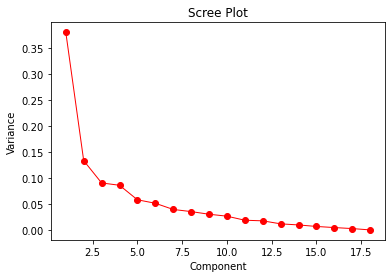

In [51]:
make_scree(pca, features)

This will be cut off at 15 components. There isn't much change after that. Since this is a very small data set, it won't take a long timet o run. If this was a large dataset, it might be better to cut off around 10-12.

In [52]:
#Reapply PCA with 15 components:
#add to poi_id
components = 15
pca = PCA(components)
features = pca.fit_transform(features)

In [53]:
# Provided to give you a starting point. Try a variety of classifiers.


In [54]:
# Example starting point. Try investigating other evaluation techniques!
#This was changed to python 3 since cross validation is depreciated.
#add to poi_id
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)




In [55]:
#Taken and adapted from my Finding Donors project
# add to poi_id
def train_predict(learner,  X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
  
    results = {}

    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:43], y_train[:43])
    end = time() # Get end time
    
    
    
    
    # Calculate the training time
    results['train_time'] = end - start
    
    
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:43])
    end = time() # Get end time
    
    # Calculate the total prediction time
    pred_time = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    acc_train = accuracy_score(y_train[:43], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    acc_test = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    f_train = fbeta_score(y_train[:43], predictions_train, beta = .5)
    
    
    # Compute F-score on the test set which is y_test
    f_test = fbeta_score(y_test, predictions_test, beta = .5)
    
  
    # Success
    print("{} trained on 43 samples.".format(learner.__class__.__name__))
        
    # Return the results
    #print(results)
    return pred_time, acc_train, acc_test, f_train, f_test

In [56]:
#Initialize the models
#Taken and Adapted from my Finding Donors project.
#add to poi_id
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier

clf_A = GaussianNB()
clf_B = LogisticRegression()
clf_C = SGDClassifier()
clf_D = RandomForestClassifier()
clf_E = DecisionTreeClassifier()




# Collect results on the learners
results = {}
pred_list = []
acc_list = []
acc_test_list = []
f_train_list = []
f_test_list = []
model_list = ['GaussianNB', 'LogisticRegression', 'SGDClassifier', 'RandomForestClassifier','AdaBoost']
for clfs in [clf_A, clf_B, clf_C, clf_D, clf_E]:
    clf_name = clfs.__class__.__name__
    results[clf_name] = {}
    
    
   
    pred_time, acc_train, acc_test, f_train, f_test= train_predict(clfs, features_train, labels_train, features_test, labels_test)
    pred_list.append(pred_time)
    acc_list.append(acc_train)
    acc_test_list.append(acc_test)
    f_train_list.append(f_train)
    f_test_list.append(f_test)



GaussianNB trained on 43 samples.
LogisticRegression trained on 43 samples.
SGDClassifier trained on 43 samples.
RandomForestClassifier trained on 43 samples.
DecisionTreeClassifier trained on 43 samples.


## Question 4
All models appear to be accurate in training, but randomforest is the best. The above 4 algorithms were used.

## Question 6 (please see Question 5 below)
There are various metrics used to check. Below plotted is accuracy on the training data. Accuracy shows how close the measurements are to the model. Precision shows how close they are to each other. Recall is a ratio of positives. Also called sensitivity
https://python-course.eu/metrics.php

 How do you test parameter values in a tuning process? How do we use the dataset in this tuning process? 
 In the tuning process, I used a few methods. I used the CV Grid Search to load up the parameter list with multiple choices
 from the sk learn documentation. There was a scoring model that is created to give them all a score. It will try the model with the different combinations of hyperparameters and then it will choose the one with the top score as the best.
 I also tried just adding some hyperparameters on my own, and then testing it with and without by re-running the code. This is very time consuming compared to the grid search but some don't have as many parameters as others. 
 
 While getting a high accuracy is important, it is a balance. We may need to sacrifice some accuracy to increase our recall 
 and/or precision. If we do too much training, our model could be very accurate, but it would be adjusted too much to the training data and then perform poorly when we use it on the actual test data. If we do too little tuning, we could potentially miss identifying pois. Since these are people of interest, it would be better to flag them and then rule them out later than miss them. 
 
 
 The precision is measuring the correct number of POIs assigned divided by the POIs that were assigned correct plus the POIs that were assigned incorrectly as POIS but weren't. This will show us how exact it is at assigning the poi status to a person.
 
 The recall is the correct number of POIs assigned divided by the correct pois plus the people that were actually pois but did not get assigned as one. This will show how complete the data is. 
 
 In this case, it would be better to assign someone as a POI and rule them out later than to miss them, so precision would
 be more imporant than recall, but at least a .3 in recall.
 
http://rushdishams.blogspot.com/2011/03/precision-and-recall.html




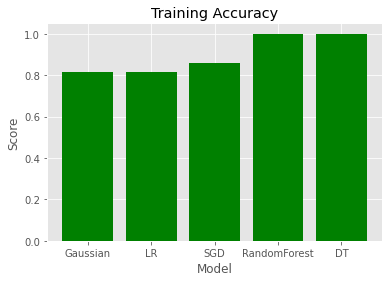

In [57]:
plt.style.use('ggplot')


y = ['Gaussian', 'LR', 'SGD', 'RandomForest', 'DT']

plt.bar(y, acc_list, color='green')
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Training Accuracy")



plt.show()

Random forest is the best in the training set,  and Gaussian is the worst in the actual test. However, recall and precision need to be checked to make sure it is not overtraining. The data set is small and not many people are really of interest. If we just mark everyone not of interest, it may look more accurate without actually predicting them.

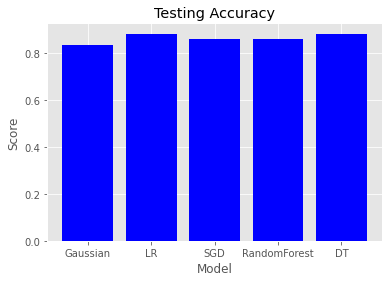

In [58]:
plt.style.use('ggplot')


y = ['Gaussian', 'LR', 'SGD', 'RandomForest','DT']

plt.bar(y, acc_test_list, color='blue')
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Testing Accuracy")



plt.show()


Once we add f-score, Logistic Regression remains the best. Because the data size is small, none took a long time to run

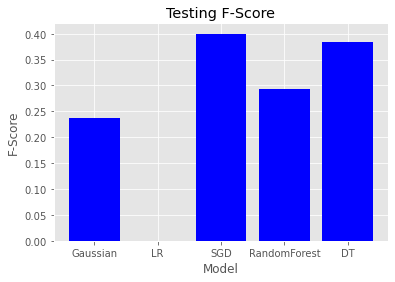

In [59]:
plt.style.use('ggplot')


y = ['Gaussian', 'LR', 'SGD', 'RandomForest','DT']

plt.bar(y, f_test_list, color='blue')
plt.xlabel("Model")
plt.ylabel("F-Score")
plt.title("Testing F-Score")



plt.show()


In [60]:
#add to poi_id
clf_list =  [clf_A,  clf_C, clf_D, clf_E]
for clf in clf_list:
    test_classifier(clf, my_dataset, features_list)

GaussianNB()
	Accuracy: 0.45127	Precision: 0.16796	Recall: 0.78800	F1: 0.27690	F2: 0.45332
	Total predictions: 15000	True positives: 1576	False positives: 7807	False negatives:  424	True negatives: 5193

SGDClassifier()
	Accuracy: 0.67693	Precision: 0.13902	Recall: 0.27400	F1: 0.18445	F2: 0.22944
	Total predictions: 15000	True positives:  548	False positives: 3394	False negatives: 1452	True negatives: 9606

RandomForestClassifier()
	Accuracy: 0.86620	Precision: 0.49263	Recall: 0.11700	F1: 0.18909	F2: 0.13805
	Total predictions: 15000	True positives:  234	False positives:  241	False negatives: 1766	True negatives: 12759

DecisionTreeClassifier()
	Accuracy: 0.82113	Precision: 0.32691	Recall: 0.32250	F1: 0.32469	F2: 0.32337
	Total predictions: 15000	True positives:  645	False positives: 1328	False negatives: 1355	True negatives: 11672



In [61]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html
#add to poi_id

In this section, Logistic Regression has hyper parameters to try to get closer. In Logistic Regression, a number of max iterations is set. The higher the number, the longer it will run. Originally, this seemed like a good candidate for the final algorithm. 
The GridSearch uses a bunch of parameters to test what will score the highest. There are different penalty strengths listed in 'C'. There are solver methods and fit intercept. 
The scorer chose these as the parameters.C=0.24, fit_intercept=False, random_state=55,
                   solver='liblinear'
In the end, this couldn't come up to the minimum so it wasn't used.

The decision tree classifier was already close , but adding a hyperparameter of balanced for the weight helped it to come over .3. 

In [63]:
# Adapted from my finding donors project
#add to poi_id
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#Initialize the classifier
clf_LR = LogisticRegression(random_state = 55, max_iter = 100)




parameters = {'C': [.24,.39 , .4, .41, .5], 'solver':['liblinear', 'newton-cg','lbfgs','sag','saga'], 
              'fit_intercept':[True, False] }




#  Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta = .5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf_LR, parameters, scoring = scorer, cv = 4)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(features_train, labels_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
print(best_clf)
# Make predictions using the unoptimized and model
predictions = (clf_LR.fit(features_train, labels_train)).predict(features_test)
best_predictions = best_clf.predict(features_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(labels_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(labels_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(labels_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(labels_test, best_predictions, beta = 0.5)))

LogisticRegression(C=0.24, fit_intercept=False, random_state=55,
                   solver='liblinear')
Unoptimized model
------
Accuracy score on testing data: 0.8837
F-score on testing data: 0.0000

Optimized Model
------
Final accuracy score on the testing data: 0.6977
Final F-score on the testing data: 0.2899


In [64]:
#Initialize the models
#Taken and Adapted from my Finding Donors project.
#add to poi_id
clf_LR = LogisticRegression(C=0.5, fit_intercept=False, random_state=55,solver='liblinear')
clf_RFC = RandomForestClassifier(bootstrap =  False, class_weight = 'balanced', random_state = 55)
clf_DT = DecisionTreeClassifier(class_weight = 'balanced')

print(clf_DT.get_params())


modified_list = ['LogisticRegression','RandomForestClassifier']
for clfs in [ clf_LR, clf_RFC]:
    clf_name = clfs.__class__.__name__
    results[clf_name] = {}
    
    
   
    pred_time, acc_train, acc_test, f_train, f_test= train_predict(clfs, features_train, labels_train, features_test, labels_test)
    pred_list.append(pred_time)
    acc_list.append(acc_train)
    acc_test_list.append(acc_test)
    f_train_list.append(f_train)
    f_test_list.append(f_test)

{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
LogisticRegression trained on 43 samples.
RandomForestClassifier trained on 43 samples.


This will test the Random Forest Classifier that was chosen and has hyper parameters on the dataset without the POI_MESSAGE_RATIO column. 
Because PCA is used, and these features were derived from other columns, it would have grouped them together, so I didn't think it would be likely to make that much difference, but the recall  and precision are actually much lower so adding this column was an improvement.  



In [65]:
## Test the model without one of the created fields - the poi message ratio
features_list2 = ['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'deferred_income', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 
                   'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock',  'TOTAL_COMPENSATION']
my_dataset_2 = data_dict

data2 = featureFormat(my_dataset_2, features_list2, sort_keys = True)

labels2, features2 = targetFeatureSplit(data2)

scale2 = preprocessing.MinMaxScaler()
features2 = scale2.fit_transform(features2)

comp = 15
pca2 = PCA(comp)
features2 = pca2.fit_transform(features2)


test_classifier(clf_DT, my_dataset_2, features_list2)

DecisionTreeClassifier(class_weight='balanced')
	Accuracy: 0.79193	Precision: 0.20011	Recall: 0.18700	F1: 0.19333	F2: 0.18948
	Total predictions: 15000	True positives:  374	False positives: 1495	False negatives: 1626	True negatives: 11505



In [66]:
''' PYTHON TESTER PY WAS ADAPTED TO RUN ON PYTHON 3.
https://stackoverflow.com/questions/53899066/what-could-be-the-reason-for-typeerror-stratifiedshufflesplit-object-is-not
#!/usr/bin/pickle

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

import pickle
import sys
from sklearn.model_selection import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(n_splits=folds, random_state=42)
    # The tester file was adjusted to run in python 3
    #cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv.split(features, labels):
    #for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
    '''

' PYTHON TESTER PY WAS ADAPTED TO RUN ON PYTHON 3.\nhttps://stackoverflow.com/questions/53899066/what-could-be-the-reason-for-typeerror-stratifiedshufflesplit-object-is-not\n#!/usr/bin/pickle\n\n""" a basic script for importing student\'s POI identifier,\n    and checking the results that they get from it \n \n    requires that the algorithm, dataset, and features list\n    be written to my_classifier.pkl, my_dataset.pkl, and\n    my_feature_list.pkl, respectively\n\n    that process should happen at the end of poi_id.py\n"""\n\nimport pickle\nimport sys\nfrom sklearn.model_selection import StratifiedShuffleSplit\nsys.path.append("../tools/")\nfrom feature_format import featureFormat, targetFeatureSplit\n\nPERF_FORMAT_STRING = "\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\tRecall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"\nRESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse 

After trying numerous algorithyms, none were very high in recall and precision. I noticed that even with hyperparameters it was hard to move those scores up significantly. I tried some more and found that Decision Tree was the closest. With one change, it met the minimum requirements, just needed the weight balanced.

## Question 5 
If the recall and the precision are not met, there are parameters that can be adjusted inside of the algorithm.If these numbers are close to 0, the algorithym should not be picked, or should be tuned. The decision tree was accurate and have over .3 precision, but under .3 recall. After changing the class weight it was over .3 recall as well.

Validation is important for a few reasons. First, it stops a third party from changing the code and making a mistake. Second, it checks to make sure that the algorithm is accurate on the test data as well as the train data. One mistake that is very common is re-fitting the model instead of just applying it. That can cause issues and for it to look like it is very accurate when it's not. Overfitting is an issue when it is adjusted too much to get all the points and it will look very accurate, but in reality, it will perform poorly in the real world. 


There are various metrics used to check. Below plotted is accuracy on the training data. Accuracy shows how close the measurements are to the model. Precision shows how close they are to each other. Recall is a ratio of positives. Also called sensitivity https://python-course.eu/metrics.php


The tester uses the sklearn Stratified shuffle split. It puts the data into folds and splits it into training and testing sets. 
It splits it into a way that preserves the proportions of the data. 

In [67]:
#add to poi_id
clf = clf_DT
test_classifier(clf, my_dataset, features_list)

DecisionTreeClassifier(class_weight='balanced')
	Accuracy: 0.84593	Precision: 0.41089	Recall: 0.35850	F1: 0.38291	F2: 0.36788
	Total predictions: 15000	True positives:  717	False positives: 1028	False negatives: 1283	True negatives: 11972



In [68]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)


## Conclusions:
The best algorithm was the decision tree. This should be able to look at future datasets and classify users as persons of interest. This dataset isn't very large, so this didn't take a long time to run. On large data sets, that might be an issue and could have led to a different decision.

References: <br>
https://www.kite.com/python/answers/how-to-convert-a-pandas-dataframe-column-from-object-to-int-in-python <br>
https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe <br>
https://sparkbyexamples.com/pandas/pandas-convert-float-to-integer-type/ <br>
https://thispointer.com/python-how-to-check-if-an-item-exists-in-list-search-by-value-or-condition/ <br>
https://thispointer.com/different-ways-to-remove-a-key-from-dictionary-in-python/ <br>
https://pythonbasics.org/seaborn-boxplot/

Special thanks to Mr. Oscar for converting the code to python 3 <br>
The features file was used from his github <br>
https://github.com/oforero/ud120-projects/tree/python-3.8 <br>